In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor

In [8]:
aqi = pd.read_csv('aqi_cleaned.csv')
aqi

,Max AQI,90th Percentile AQI,Median AQI,% Good Days,% Unhealthy for Sensitive Groups Days,% Unhealthy Days,% Very Unhealthy Days,% Days CO,% Days NO2,% Days PM2.5,% Days PM10,County_State
0,74,49,36,0.929368,0.000000,0.000000,0.0,0.0,0.000000,0.263941,0.000000,"Baldwin, AL"
1,86,49,26,0.916667,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,"Clay, AL"
2,90,45,36,0.961538,0.000000,0.000000,0.0,0.0,0.000000,0.090659,0.000000,"DeKalb, AL"
3,47,41,31,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,"Elmore, AL"
4,92,46,34,0.935252,0.000000,0.000000,0.0,0.0,0.000000,0.266187,0.000000,"Etowah, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...
993,151,61,44,0.811475,0.010929,0.002732,0.0,0.0,0.000000,0.030055,0.000000,"Sublette, WY"
994,1250,76,46,0.650273,0.019126,0.010929,0.0,0.0,0.013661,0.019126,0.275956,"Sweetwater, WY"
995,161,54,42,0.868852,0.019126,0.013661,0.0,0.0,0.000000,0.101093,0.000000,"Teton, WY"
996,122,51,40,0.882514,0.005464,0.000000,0.0,0.0,0.005464,0.000000,0.379781,"Uinta, WY"


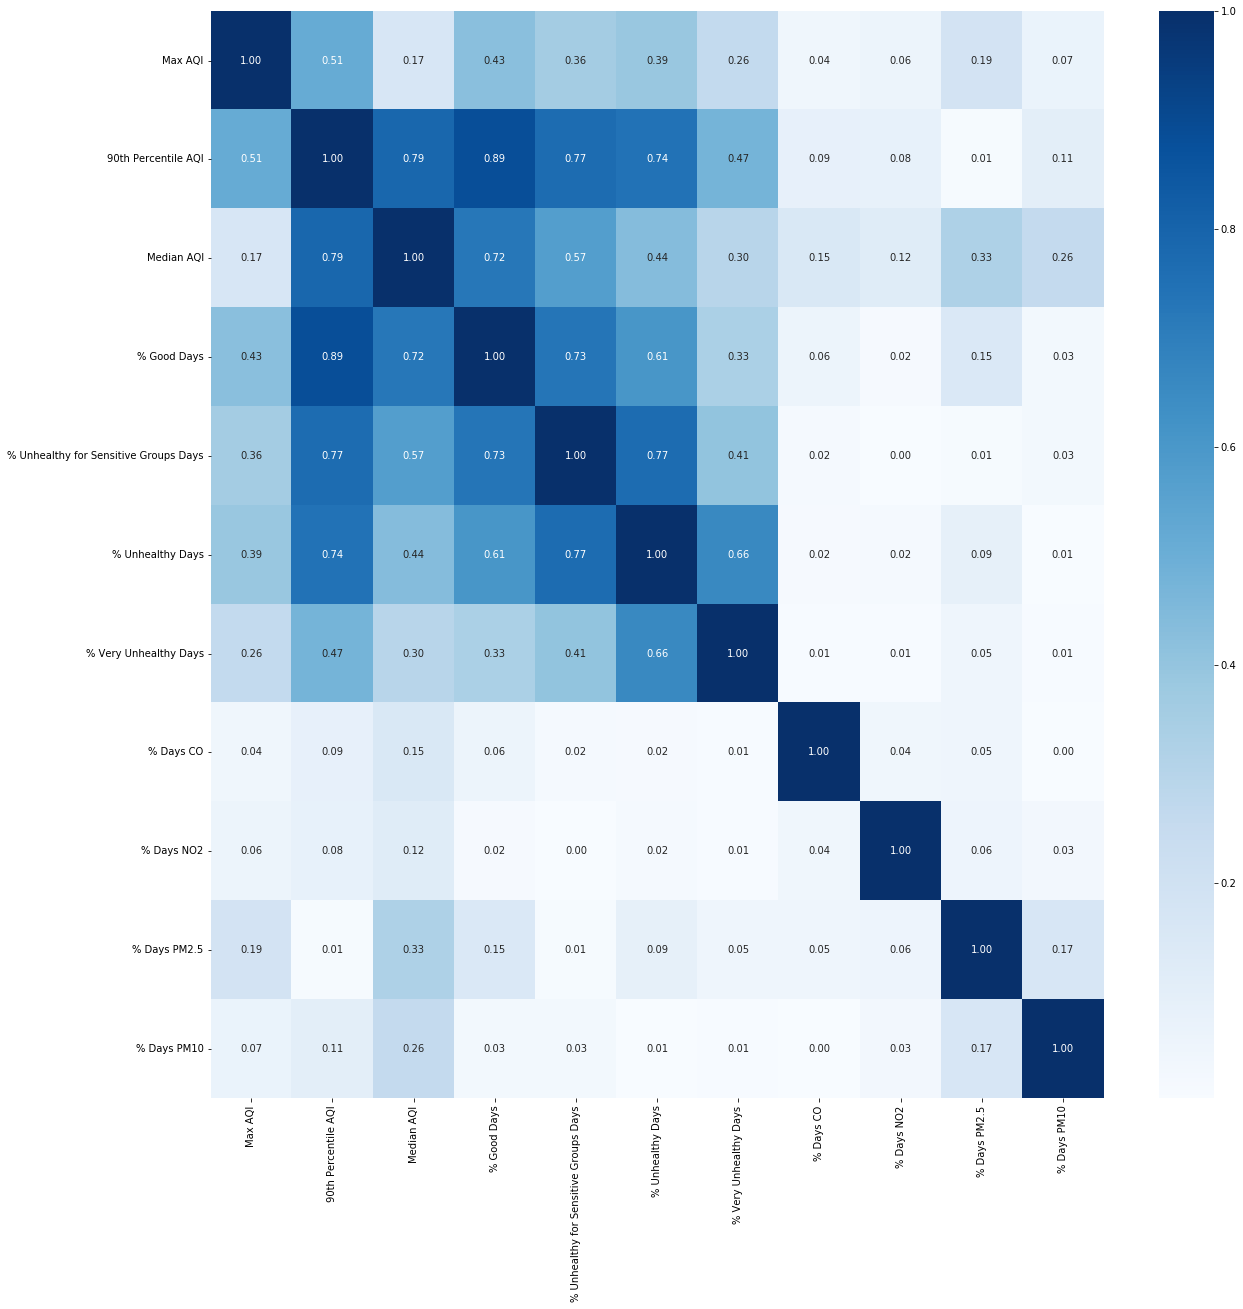

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(aqi.iloc[:,:13].corr()),annot=True, fmt=".2f",cmap='Blues');

In [10]:
demo = pd.read_csv('model_data_V1.csv')
demo

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,"% Educational Attainment | Bachelor's degree or higher, 2021 [Estimated]","Population Density (per square mile), 2021 [Estimated]","% Household Size | 1-person household, 2021 [Estimated]","% Household Size | 2-person household, 2021 [Estimated]","% Household Size | 3-person household, 2021 [Estimated]","% Household Size | 4-person household, 2021 [Estimated]","% Household Size | 5-person household, 2021 [Estimated]","% Household Size | 6-person household, 2021 [Estimated]","# Gini Index Of Income Inequality [B19083] | Gini Index, 2019","% Hispanic or Latino | Hispanic or Latino, 2021 [Estimated]"
0,24494.0,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,0.123867,0.143505,...,0.172737,49.6310,0.322195,0.413428,0.090814,0.110925,0.037394,0.007437,0.4790,0.018942
1,62669.0,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,0.119038,0.126378,...,0.145731,95.7722,0.237690,0.321698,0.158837,0.143103,0.090112,0.032961,0.4791,0.034838
2,32525.0,0.061614,0.058663,0.034343,0.015127,0.059493,0.106841,0.098693,0.112283,0.158370,...,0.194525,72.1216,0.290439,0.371741,0.157603,0.080609,0.050535,0.023844,0.4480,0.095448
3,465948.0,0.063799,0.072117,0.044368,0.026192,0.061928,0.140647,0.137781,0.126969,0.119636,...,0.382892,452.3167,0.315286,0.346197,0.138452,0.109892,0.056727,0.019380,0.4615,0.086253
4,6965.0,0.056856,0.063460,0.038478,0.014788,0.050251,0.110840,0.102513,0.113424,0.159081,...,0.179435,12.0786,0.306025,0.403252,0.120816,0.085751,0.031240,0.031878,0.4298,0.025742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,76999.0,0.079274,0.076598,0.040247,0.022948,0.072546,0.157742,0.123716,0.102352,0.112664,...,0.150731,38.5523,0.214115,0.352553,0.144363,0.131406,0.090699,0.039721,0.4429,0.651439
3216,5282.0,0.092389,0.060962,0.043165,0.022151,0.053578,0.135933,0.113593,0.095418,0.136691,...,0.225747,4.1977,0.214717,0.454041,0.097467,0.109771,0.069481,0.032569,0.4235,0.249068
3217,210821.0,0.069376,0.068964,0.041087,0.028750,0.086206,0.137956,0.107015,0.100388,0.095645,...,0.123845,14.3798,0.231796,0.281321,0.117368,0.205789,0.070782,0.045907,0.5641,0.945810
3218,9970.0,0.069609,0.086861,0.036911,0.014945,0.060481,0.119358,0.102006,0.123470,0.119057,...,0.098139,9.3194,0.124038,0.312611,0.211368,0.129070,0.136471,0.049438,0.4146,0.936978


In [11]:
str_to_remove = [' CITY COUNTY',' COUNTY',' PARISH',' MUNICIPIO',' MUNICIPALITY',' CENSUS AREA',' CITY AND BOROUGH',' BOROUGH']
for target in str_to_remove:
    demo['Name'] = demo['Name'].str.upper().str.replace(target,'')
demo['Name']

0       ABBEVILLE, SC
1          ACADIA, LA
2        ACCOMACK, VA
3             ADA, ID
4           ADAIR, IA
            ...      
3215         YUMA, AZ
3216         YUMA, CO
3217       ZAPATA, TX
3218       ZAVALA, TX
3219      ZIEBACH, SD
Name: Name, Length: 3220, dtype: object

In [19]:
aqi['County_State'] = aqi['County_State'].str.upper()
aqi['County_State']

0         BALDWIN, AL
1            CLAY, AL
2          DEKALB, AL
3          ELMORE, AL
4          ETOWAH, AL
            ...      
993      SUBLETTE, WY
994    SWEETWATER, WY
995         TETON, WY
996         UINTA, WY
997        WESTON, WY
Name: County_State, Length: 998, dtype: object

In [20]:
model_v2_inner_merged = demo.merge(aqi,left_on='Name',right_on='County_State').drop(['County_State','Name','FIPS'],axis=1)
model_v2_inner_merged.to_csv('model_v2_inner_merged.csv',index=False)

In [21]:
model_v2 = demo.merge(aqi,left_on='Name',right_on='County_State',how='left')
model_v2 = model_v2.drop(['County_State','Name'],axis=1)
model_v2

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,90th Percentile AQI,Median AQI,% Good Days,% Unhealthy for Sensitive Groups Days,% Unhealthy Days,% Very Unhealthy Days,% Days CO,% Days NO2,% Days PM2.5,% Days PM10
0,24494.0,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,0.123867,0.143505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62669.0,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,0.119038,0.126378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32525.0,0.061614,0.058663,0.034343,0.015127,0.059493,0.106841,0.098693,0.112283,0.158370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,465948.0,0.063799,0.072117,0.044368,0.026192,0.061928,0.140647,0.137781,0.126969,0.119636,...,72.0,40.0,0.745902,0.030055,0.019126,0.0,0.0,0.060109,0.338798,0.016393
4,6965.0,0.056856,0.063460,0.038478,0.014788,0.050251,0.110840,0.102513,0.113424,0.159081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,76999.0,0.079274,0.076598,0.040247,0.022948,0.072546,0.157742,0.123716,0.102352,0.112664,...,69.0,44.0,0.702186,0.005464,0.000000,0.0,0.0,0.000000,0.191257,0.166667
3216,5282.0,0.092389,0.060962,0.043165,0.022151,0.053578,0.135933,0.113593,0.095418,0.136691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,210821.0,0.069376,0.068964,0.041087,0.028750,0.086206,0.137956,0.107015,0.100388,0.095645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,9970.0,0.069609,0.086861,0.036911,0.014945,0.060481,0.119358,0.102006,0.123470,0.119057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
model_v2.to_csv('model_v2_with_NaNs.csv',index=False)

In [23]:
for c in model_v2.columns:
    model_v2[c].fillna(value=model_v2[c].median(), inplace=True)
model_v2

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,90th Percentile AQI,Median AQI,% Good Days,% Unhealthy for Sensitive Groups Days,% Unhealthy Days,% Very Unhealthy Days,% Days CO,% Days NO2,% Days PM2.5,% Days PM10
0,24494.0,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,0.123867,0.143505,...,51.0,36.0,0.897760,0.000000,0.000000,0.0,0.0,0.000000,0.362135,0.000000
1,62669.0,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,0.119038,0.126378,...,51.0,36.0,0.897760,0.000000,0.000000,0.0,0.0,0.000000,0.362135,0.000000
2,32525.0,0.061614,0.058663,0.034343,0.015127,0.059493,0.106841,0.098693,0.112283,0.158370,...,51.0,36.0,0.897760,0.000000,0.000000,0.0,0.0,0.000000,0.362135,0.000000
3,465948.0,0.063799,0.072117,0.044368,0.026192,0.061928,0.140647,0.137781,0.126969,0.119636,...,72.0,40.0,0.745902,0.030055,0.019126,0.0,0.0,0.060109,0.338798,0.016393
4,6965.0,0.056856,0.063460,0.038478,0.014788,0.050251,0.110840,0.102513,0.113424,0.159081,...,51.0,36.0,0.897760,0.000000,0.000000,0.0,0.0,0.000000,0.362135,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,76999.0,0.079274,0.076598,0.040247,0.022948,0.072546,0.157742,0.123716,0.102352,0.112664,...,69.0,44.0,0.702186,0.005464,0.000000,0.0,0.0,0.000000,0.191257,0.166667
3216,5282.0,0.092389,0.060962,0.043165,0.022151,0.053578,0.135933,0.113593,0.095418,0.136691,...,51.0,36.0,0.897760,0.000000,0.000000,0.0,0.0,0.000000,0.362135,0.000000
3217,210821.0,0.069376,0.068964,0.041087,0.028750,0.086206,0.137956,0.107015,0.100388,0.095645,...,51.0,36.0,0.897760,0.000000,0.000000,0.0,0.0,0.000000,0.362135,0.000000
3218,9970.0,0.069609,0.086861,0.036911,0.014945,0.060481,0.119358,0.102006,0.123470,0.119057,...,51.0,36.0,0.897760,0.000000,0.000000,0.0,0.0,0.000000,0.362135,0.000000


In [24]:
model_v2.to_csv('model_v2.csv',index=False)

In [25]:
model_v2['FIPS']

0       45001
1       22001
2       51001
3       16001
4       19001
        ...  
3215     4027
3216     8125
3217    48505
3218    48507
3219    46137
Name: FIPS, Length: 3220, dtype: int64

In [26]:
elec = pd.read_csv('election_data.csv')
elec

,index,DEMOCRAT,REPUBLICAN
0,1001,0.237697,0.727666
1,1003,0.193856,0.765457
2,1005,0.465278,0.520967
3,1007,0.212496,0.764032
4,1009,0.084258,0.893348
...,...,...,...
3149,56037,0.188616,0.709515
3150,56039,0.579235,0.310525
3151,56041,0.141913,0.726564
3152,56043,0.139486,0.763241


In [27]:
model_v3 = model_v2.merge(elec,left_on='FIPS',right_on='index')
model_v3 = model_v3.drop(['FIPS','index'],axis=1).rename(columns = {'DEMOCRAT':'% Democrat - 2016','REPUBLICAN':'% Republican - 2016'})
model_v3

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,% Good Days,% Unhealthy for Sensitive Groups Days,% Unhealthy Days,% Very Unhealthy Days,% Days CO,% Days NO2,% Days PM2.5,% Days PM10,% Democrat - 2016,% Republican - 2016
0,24494.0,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,0.123867,0.143505,...,0.897760,0.000000,0.000000,0.0,0.0,0.000000,0.362135,0.000000,0.347193,0.627657
1,62669.0,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,0.119038,0.126378,...,0.897760,0.000000,0.000000,0.0,0.0,0.000000,0.362135,0.000000,0.205849,0.772646
2,32525.0,0.061614,0.058663,0.034343,0.015127,0.059493,0.106841,0.098693,0.112283,0.158370,...,0.897760,0.000000,0.000000,0.0,0.0,0.000000,0.362135,0.000000,0.426097,0.542610
3,465948.0,0.063799,0.072117,0.044368,0.026192,0.061928,0.140647,0.137781,0.126969,0.119636,...,0.745902,0.030055,0.019126,0.0,0.0,0.060109,0.338798,0.016393,0.386760,0.479136
4,6965.0,0.056856,0.063460,0.038478,0.014788,0.050251,0.110840,0.102513,0.113424,0.159081,...,0.897760,0.000000,0.000000,0.0,0.0,0.000000,0.362135,0.000000,0.297297,0.645762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,76999.0,0.079274,0.076598,0.040247,0.022948,0.072546,0.157742,0.123716,0.102352,0.112664,...,0.702186,0.005464,0.000000,0.0,0.0,0.000000,0.191257,0.166667,0.464158,0.474722
3110,5282.0,0.092389,0.060962,0.043165,0.022151,0.053578,0.135933,0.113593,0.095418,0.136691,...,0.897760,0.000000,0.000000,0.0,0.0,0.000000,0.362135,0.000000,0.151534,0.803590
3111,210821.0,0.069376,0.068964,0.041087,0.028750,0.086206,0.137956,0.107015,0.100388,0.095645,...,0.897760,0.000000,0.000000,0.0,0.0,0.000000,0.362135,0.000000,0.656588,0.327498
3112,9970.0,0.069609,0.086861,0.036911,0.014945,0.060481,0.119358,0.102006,0.123470,0.119057,...,0.897760,0.000000,0.000000,0.0,0.0,0.000000,0.362135,0.000000,0.776207,0.204358


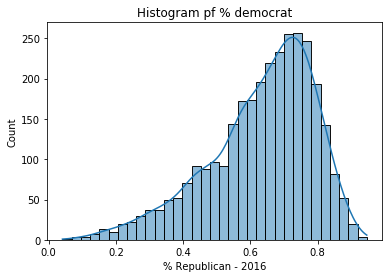

In [32]:
sns.histplot(model_v3.loc[:,'% Republican - 2016'],kde=True)
plt.title('Histogram pf % democrat');

In [36]:
model_v3.loc[:,['% Republican - 2016','% Democrat - 2016']].corr()

,% Republican - 2016,% Democrat - 2016
% Republican - 2016,1.00000,-0.98095
% Democrat - 2016,-0.98095,1.00000


In [37]:
model_v3 = model_v3.drop('% Republican - 2016',axis=1)

In [38]:
# model_v3[model_v3['Max AQI'].isna()]['index']

In [39]:
model_v3.to_csv('model_v3.csv',index=False)